In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from sklearn.datasets import make_blobs

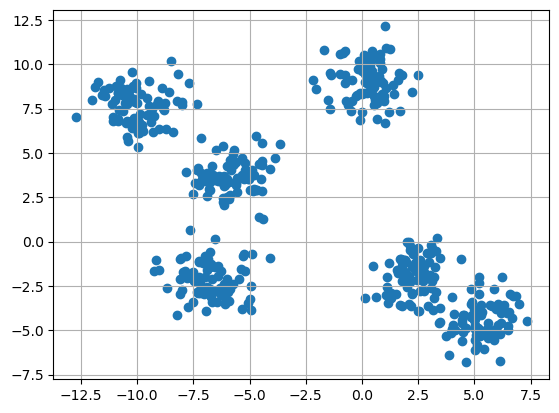

In [13]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 6,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

##  Initializing random centroids

In [16]:
k = 6

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []},
 3: {'center': array([-1.33144319, -0.43023013]), 'points': []},
 4: {'center': array([ 0.47220939, -0.35227962]), 'points': []},
 5: {'center': array([-1.99014048,  1.53612873]), 'points': []}}

## plotting the centers

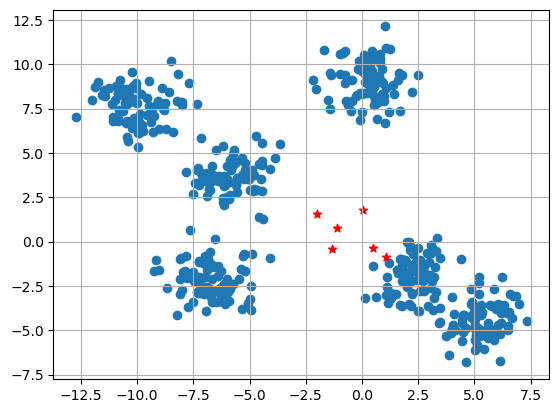

In [19]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [21]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [23]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

In [25]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [27]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

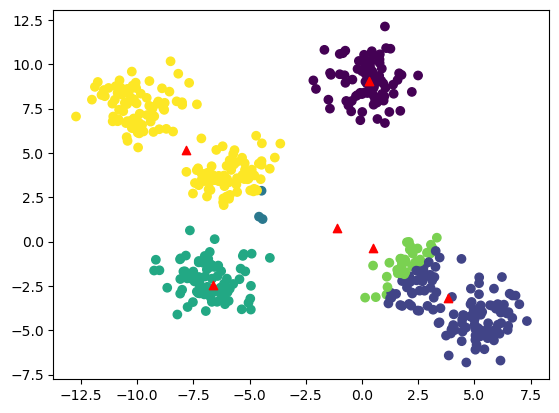

In [29]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

## Implementation by own way


In [16]:
x,y=make_blobs(n_samples=1000,n_features=3,centers=6,random_state=5)

In [18]:
x.shape[1]

3

In [20]:
k=6

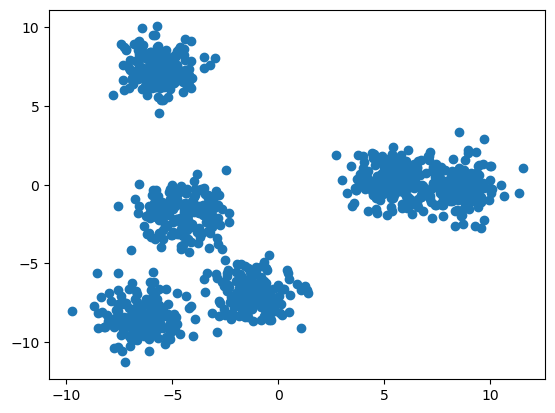

In [22]:
plt.figure(0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [26]:
clusters={}
np.random.seed(23)
for i in range(k):
    center = 2*(2*np.random.random((x.shape[1],))-1)
    cluster={'centers':center,'points':[]}
    clusters[i]=cluster
clusters
    


{0: {'centers': array([0.06919154, 1.78785042, 1.06183904]), 'points': []},
 1: {'centers': array([-0.87041662, -1.11581855,  0.74488834]), 'points': []},
 2: {'centers': array([-1.33144319, -0.43023013,  0.47220939]), 'points': []},
 3: {'centers': array([-0.35227962, -1.99014048,  1.53612873]), 'points': []},
 4: {'centers': array([ 1.53979015, -0.79836124,  0.35832746]), 'points': []},
 5: {'centers': array([ 1.91370766,  1.38037529, -1.73969824]), 'points': []}}

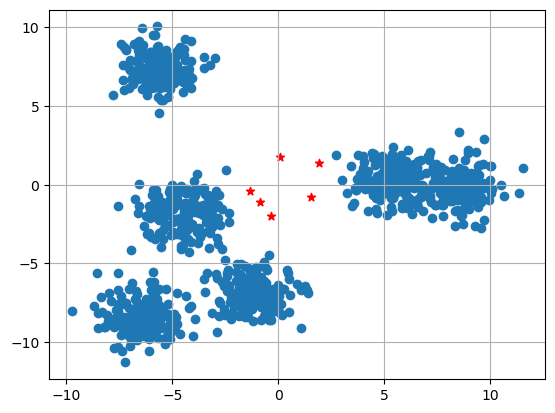

In [32]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['centers']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [34]:
def distance(x,y):
    return np.sqrt(np.sum((x-y)**2))
def minvalue(x):
    a=x[0]
    for i in range(len(x)):
        if x[i]<a:
            a=x[i]
return a

In [ ]:
def assign(x,clusters):
    for i in range(x.shape[0]):
        dist=[]
        curr=x[i]
        
        for j in range(k):
            dist.append(distance(curr,clusters[j]['center']
            
        curr_cluster = minvalue(dist)
        clusters[curr_cluster]['points'].append(curr)
    return clusters
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters
  
    